<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-1K/blob/main/Medical_Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing base libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor

from pandas_profiling import ProfileReport

## Importing the dataframe

In [2]:
url = 'https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/insurance.csv'
data = pd.read_csv(url,error_bad_lines=False)
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Data exploration

In [3]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
r,c = data.shape
print("Number of rows =",r)
print("Number of columns =",c)

Number of rows = 1338
Number of columns = 7


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data visualization

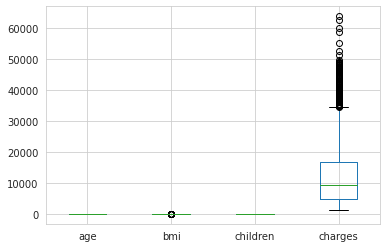

In [7]:
sns.set_style("whitegrid")
data.plot.box()

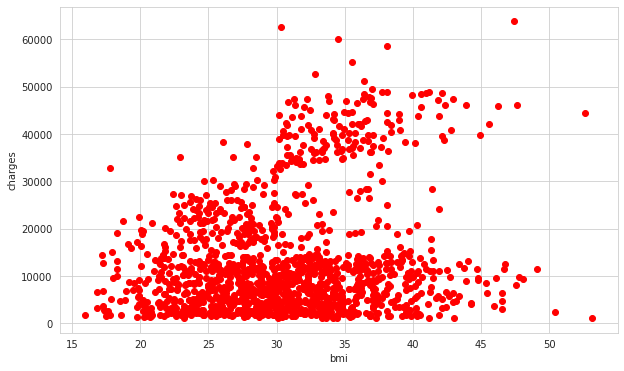

In [8]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(data['bmi'],data['charges'],color = 'red')
ax.set_xlabel("bmi")
ax.set_ylabel("charges")
plt.show()

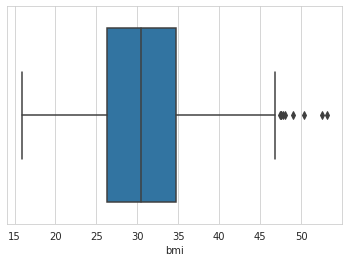

In [9]:
sns.boxplot(x = data['bmi'])

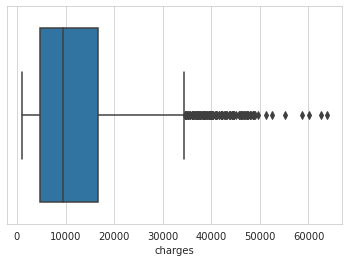

In [10]:
sns.boxplot(x = data['charges'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

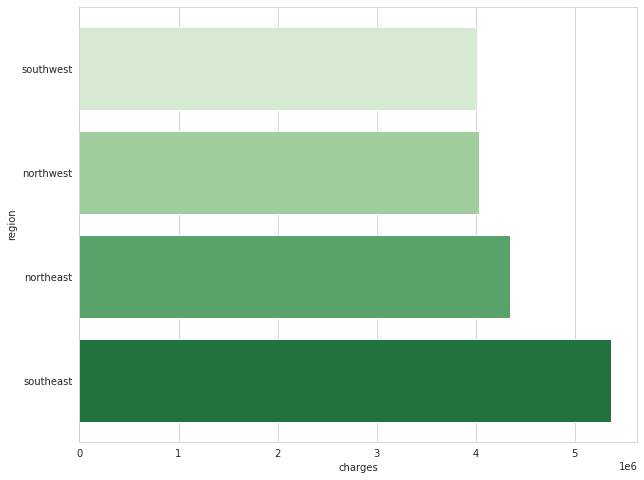

In [12]:
charges = data['charges'].groupby(data.region).sum().sort_values(ascending = True)
f , ax = plt.subplots(1,1,figsize = (10,8))
ax = sns.barplot(charges.head(), charges.head().index, palette = 'Greens')
plt.plot()

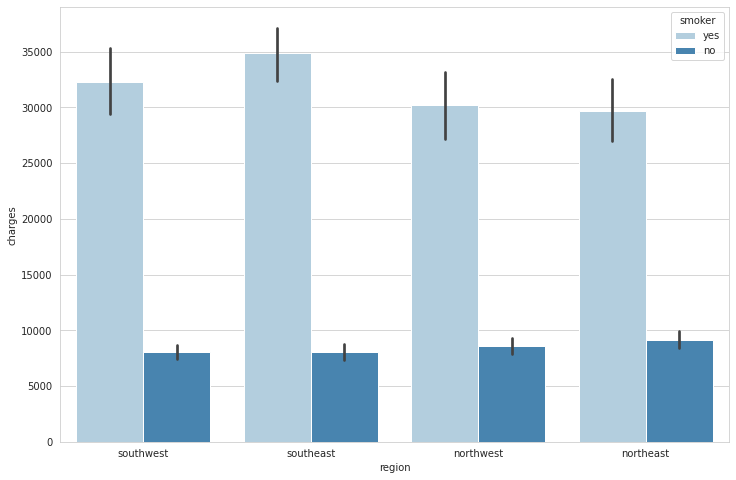

In [13]:
f , ax = plt.subplots(1,1, figsize = (12,8))
ax = sns.barplot(x = 'region' , y = 'charges', hue = 'smoker', data = data , palette = 'Blues')

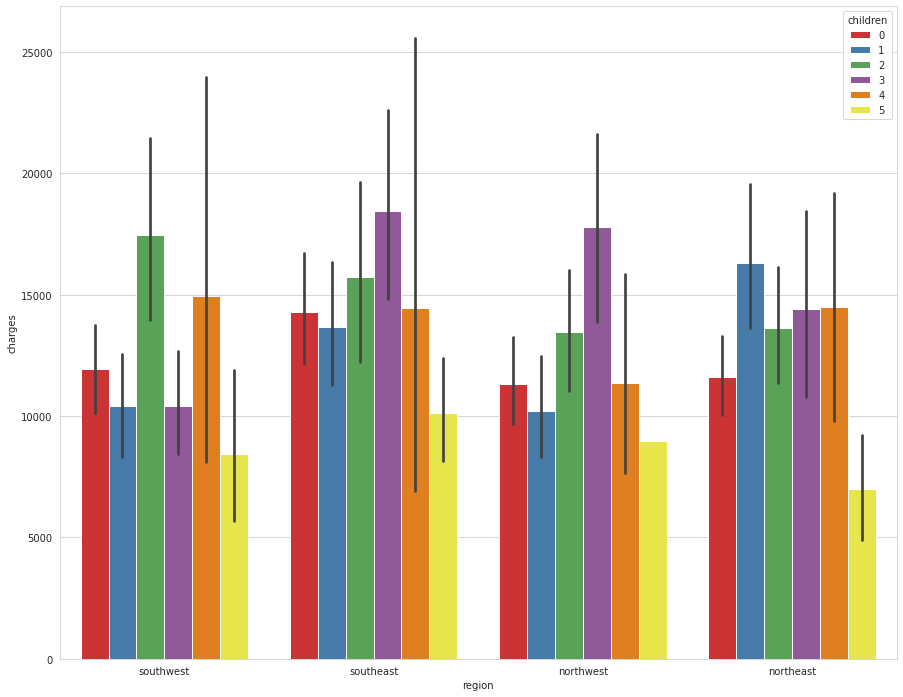

In [14]:
f , ax = plt.subplots(1,1,figsize = (15,12))
ax = sns.barplot(x = 'region', y = 'charges', hue = 'children', data =data, palette = 'Set1')


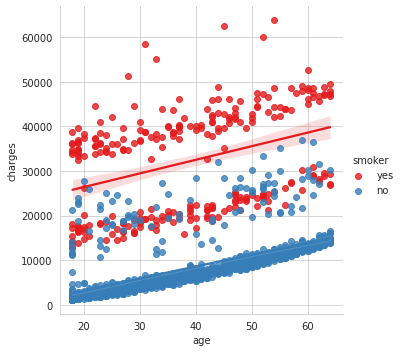

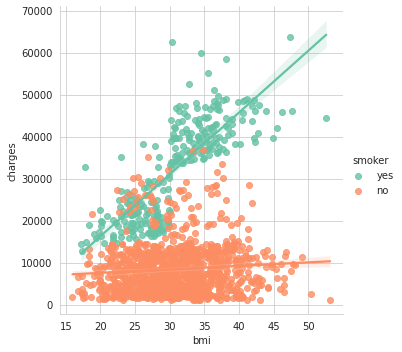

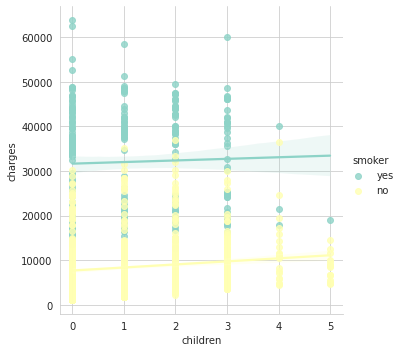

In [15]:
ax = sns.lmplot(x = 'age', y = 'charges' , hue = 'smoker', data = data, palette = 'Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges' , hue = 'smoker', data = data, palette = 'Set2')
ax = sns.lmplot(x = 'children', y = 'charges' , hue = 'smoker', data = data, palette = 'Set3')


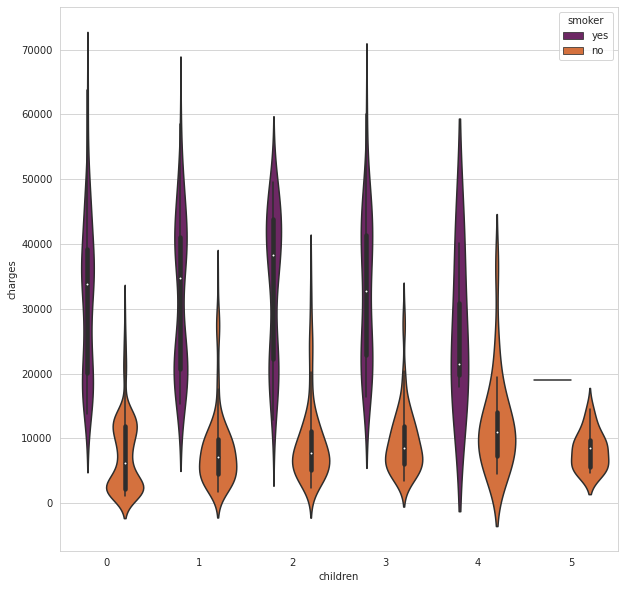

In [16]:
f,ax=plt.subplots(1,1,figsize=(10,10))
ax=sns.violinplot(x='children',y='charges',data=data,orient='v',hue='smoker',palette='inferno')

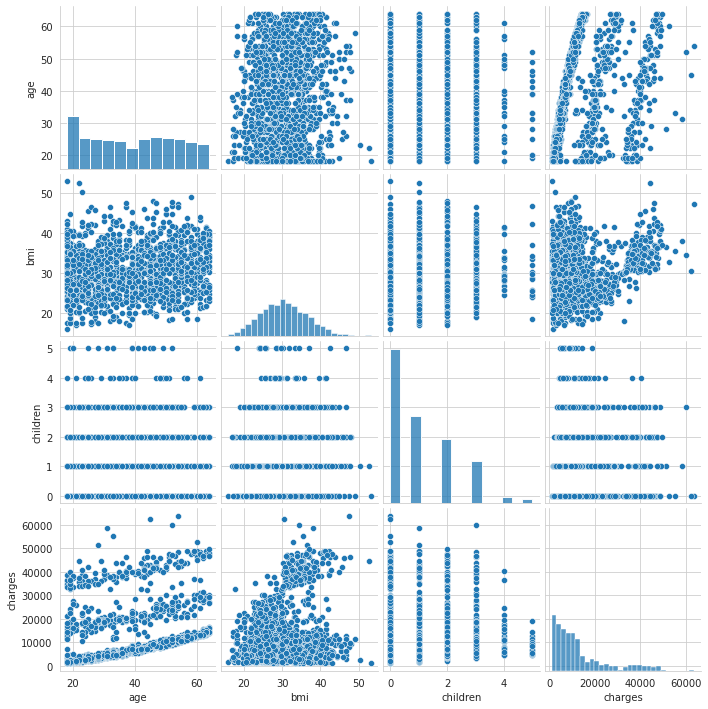

In [17]:
sns.pairplot(data)

In [19]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

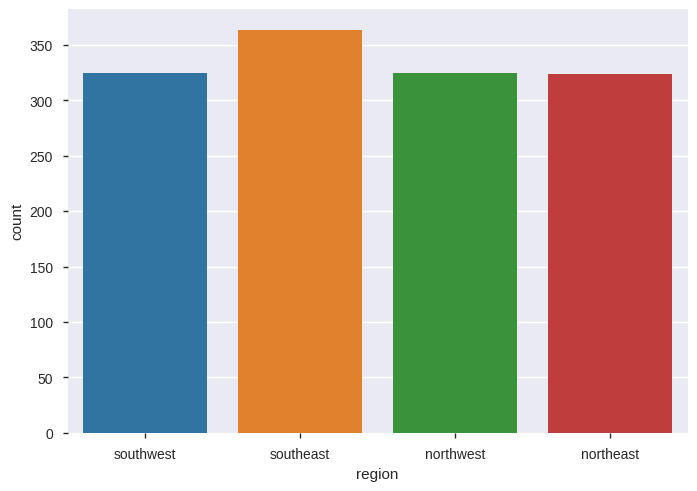

In [20]:
sns.countplot(x = 'region', data = data)

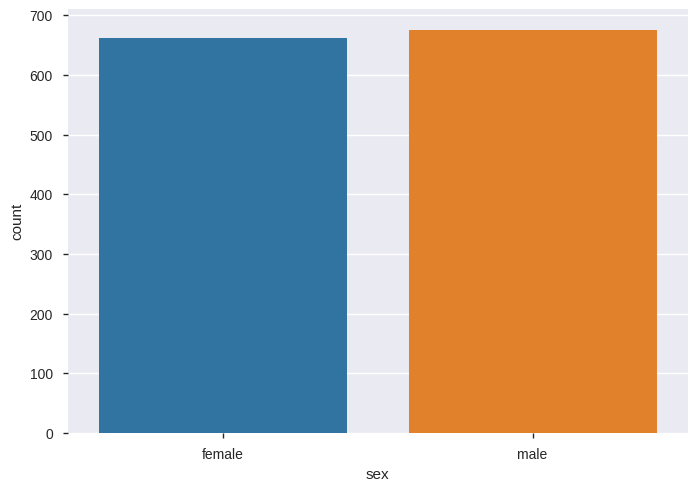

In [21]:
sns.countplot(x = 'sex', data = data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


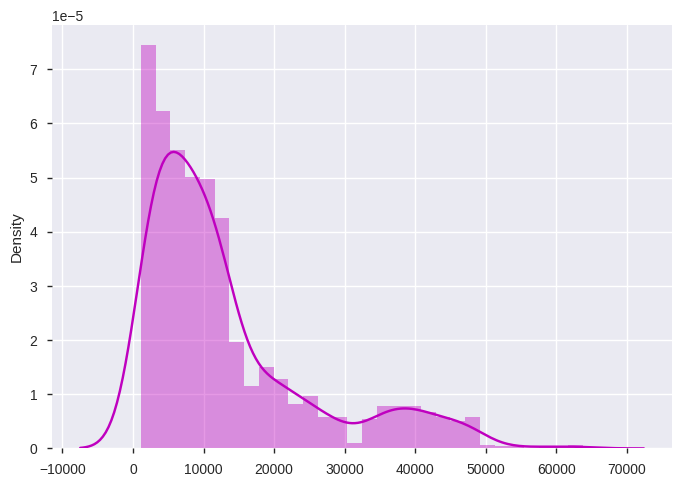

In [22]:
sns.distplot(x= data['charges'], color = 'm')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


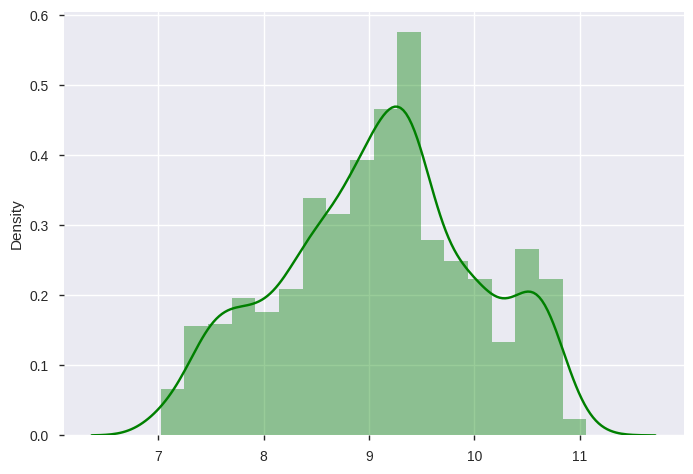

In [23]:
sns.distplot(x = np.log(data['charges']),color = 'g')

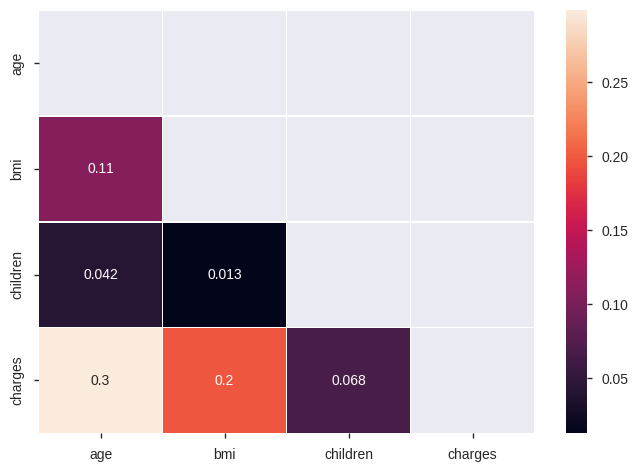

In [24]:
corr = data.corr('pearson')
mask = np.triu(corr)
sns.heatmap(corr, linewidth = 0.5 , mask = mask , annot = True)


## Machine Learning Model Generation

In [25]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label.fit(data.sex.drop_duplicates())
data.sex=label.transform(data.sex)
label.fit(data.smoker.drop_duplicates())
data.smoker=label.transform(data.smoker)
label.fit(data.region.drop_duplicates())
data.region=label.transform(data.region)

In [26]:
x=data.drop(['charges'],axis=1)
y=data['charges']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
Lin_reg=LinearRegression()
Lin_reg.fit(x_train,y_train)

LinearRegression()

In [27]:
print(Lin_reg.score(x_test,y_test))

0.7998747145449959


In [28]:
linreg = LinearRegression()
rfc = RandomForestRegressor(n_estimators = 500 , max_features = 6 , max_depth = 10 , min_samples_leaf = 6)
abr = AdaBoostRegressor(learning_rate = 0.1 )
gbr = GradientBoostingRegressor()
xgb = XGBRegressor(gamma = 0.5)
models = [linreg, rfc, abr, gbr, xgb]

In [29]:
def training(model):
    score_dict =[]
    error_dict =[]
    for m in model:
        m.fit(x_train,y_train)
        score = m.score(x_test, y_test)
        y_pred = m.predict(x_test)
        model_rmse = mean_squared_error(y_test, y_pred, squared = False)
        print("for the model",m, "the acceuracy & error are ", score, model_rmse)
        score_dict.append(score)
        error_dict.append(model_rmse)
    print("the final Results are :\n")
    print(score_dict)
    print(error_dict)
        

In [30]:
training(models)

for the model LinearRegression() the acceuracy & error are  0.7998747145449959 5643.219748880902
for the model RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=6,
                      n_estimators=500) the acceuracy & error are  0.8990812786988789 4007.392209185982
for the model AdaBoostRegressor(learning_rate=0.1) the acceuracy & error are  0.8689788016485378 4566.114141922859
for the model GradientBoostingRegressor() the acceuracy & error are  0.8979528163448718 4029.735039691765
[08:45:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
for the model XGBRegressor(gamma=0.5) the acceuracy & error are  0.8977839346540404 4033.0681406614603
the final Results are :

[0.7998747145449959, 0.8990812786988789, 0.8689788016485378, 0.8979528163448718, 0.8977839346540404]
[5643.219748880902, 4007.392209185982, 4566.114141922859, 4029.735039691765, 4033.0681406614603]


In [31]:
RFC = RandomForestRegressor(n_estimators = 500 , max_features = 6 , max_depth = 10 , min_samples_leaf = 6)
RFC.fit(x_train , y_train)

RandomForestRegressor(max_depth=10, max_features=6, min_samples_leaf=6,
                      n_estimators=500)

In [32]:
score = RFC.score(x_test, y_test)
print(score)

0.8995270106111187


## **Conclusion**
we can predict medical charges of a person given the five features age, sex, bmi, children, smoker, region with 90% accuracy.